# 머신러닝 학습이란

머신러닝 학습 소개

> `교안2-02머신러닝-학습소개.pdf`


# 03. 첫번째 Scikit-learn 머신러닝 학습


지도학습: 붓꽃의 품종 분류

scikit-learn 에는 전통적인 데이터 세트로 붓꽃 데이터를 제공하고 있다.  이 데이터는 전문 식물학자가 식별한 종인  Setosa, Versicolor, Virginica 에 속하는 붓꽃을 측정한 결과를 붓꽃에 대한 꽃잎(petal)의 폭과 길이, 꽃받침(sepal)의 폭과 길이가 있다. 이를 학습을 통해 어떤 붓꽃 데이터 세트로 붓꽃의 품종을 분류(classification)하는 것이다.

<img src='https://tensorflowkorea.files.wordpress.com/2017/06/1-2.png' width='250'>


### scikit-learn을 활용한 기계 학습

기계 학습이란 말 그대로 엄마가 아이를 가르치듯이 기계를 학습시키는 것이다. 엄마가 아이에게 하나 하나 가르치는 것과는 달리, 우리가 가지고 있는 데이터를 기계에 학습시킨 후 학습한 데이터와 유사한 데이터를 입력하면 기계는 우리가 알고 싶어하는 정보를 예측한다. 마치, 선생님이 학생들에게 시험 범위 안에서 학습을 시킨 후 시험을 보는 것도 비슷하다. 가장 쉽게 접할 수 있는 예는 이메일을 자동으로 분류하는 시스템이다. 이 시스템은 이전에 온 스팸 이메일 정보를 근거로 새로 온 이메일이 스팸인지 아닌지 분류한다.

이 글은 간단한 예제에 기계 학습을 적용하면서 기계 학습의 전반적인 이해를 높이도록 하는 것이 목적이다. 예제는 파이썬을 기반으로 하며 기계 학습을 쉽게 적용할 수 있도록 scikit-learn 라이브러리를 사용한다.

### - 필수 라이브러리와 도구들

예제 실행하려면 numpy, scipy, scikit-learn, matplotlib, pandas와 pillow 패키지가 필요. 결정 트리와 신경망 구조에 대한 그래프를 그리려면 graphviz도 필요.

- 바이너리 배포본 Anaconda 의 기본 base환경은 사이킷런등을 포함.

#### conda를 사용한 패키지 설치

설치된 파이썬이 있다면 conda 패키지 매니저를 사용하여 다음 명령을 실행하면 필요한 패키지를 모두 얻을 수 있습니다.

```terminal
$ conda install numpy scipy scikit-learn matplotlib pandas pillow graphviz python-graphviz
```

#### pip를 사용한 패키지 설치

파이썬이 있고 pip를 사용하여 패키지를 설치하려면 다음 명령을 사용합니다.

```terminal
$ pip install numpy scipy scikit-learn matplotlib pandas pillow graphviz
```

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn

sklearn.show_versions()


System:
    python: 3.9.9 (main, Dec  4 2021, 19:22:04)  [GCC 9.3.0]
executable: /home/qkboo/.pyenv/versions/3.9.9/envs/tf25gpu_p39/bin/python3.9
   machine: Linux-5.10.60.1-microsoft-standard-WSL2-x86_64-with-glibc2.31

Python dependencies:
          pip: 21.3.1
   setuptools: 58.1.0
      sklearn: 1.0.1
        numpy: 1.21.4
        scipy: 1.7.3
       Cython: None
       pandas: 1.3.4
   matplotlib: 3.5.0
       joblib: 1.1.0
threadpoolctl: 3.0.0

Built with OpenMP: True


## - 사이킷런 프레임워크 살펴보기

scikit-learn의 머신러닝 모델은 Estimator 라는 클래스를 기반으로 구현되어 있다. 주요한 Estimator 클래스는 기본적으로 Classifier와 Regressor로 나뉜다. 

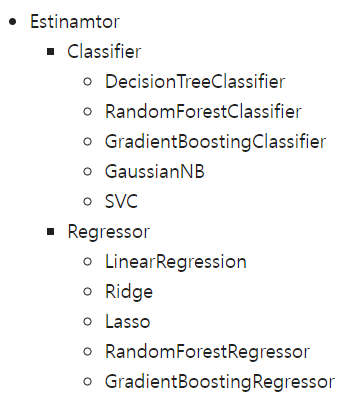

각각의 Estimator는 내부에서 fit( ) 과 predict( ) 를 내부에서 구현하고 있습니다.

 - fit( ) : 주어진 데이터로 모델을 학습시키는 메소드입니다.
 - predict( ) : 학습된 모델로 예측을 수행하는 메소드입니다.
 - transform( ) : 입력된 데이터의 형태에 맞추어 데이터를 변환하는 메소드 입니다.

# 붓꽃의 품종 분류

scikit-learn 에는 전통적인 데이터 세트로 붓꽃 데이터를 제공하고 있다.  이 데이터는 전문 식물학자가 식별한 종인  Setosa, Versicolor, Virginica 에 속하는 붓꽃을 측정한 결과를 붓꽃에 대한 꽃잎(petal)의 폭과 길이, 꽃받침(sepal)의 폭과 길이가 있다. 이를 학습을 통해 어떤 붓꽃 데이터 세트로 붓꽃의 품종을 분류(classification)하는 것이다.

<img src='https://tensorflowkorea.files.wordpress.com/2017/06/1-2.png' width='250'>


iris_dataset
 - 영국의 통계학자이자 생물학자인 로널드 피셔 (Ronald 가 소개한 다변수 데이터셋
 - 전문 식물학자가 식별한 종인 Setosa , Versicolor, Verginica 의 꽃잎과 꽃받침의 길이와 너비 정보가 담겨 있다

## - 분류(Classification)

분류은 대표적 지도학습방법의 하나이다. 지도학습은 학습을 위한 다양한 **피처**와 분류 결정 값인 **레이블(타깃)** 데이터로 모델을 학습한 뒤 다른 테스트 데이터 세트를 이용해서 미지의 레이블을 학습한다. 특정 분류 결정 값 데이터 포인트에 대해서 이 종이 속하는 레이블 label이라 부른다.

## - Step 1. Extract Features

머신러닝을 시작할 때 , 간단한 데이터셋으로 알고리즘을 테스트해보는 것은 머신러닝 이해에 매우 유용

- 사이킷런에는 머신러닝을 쉽게 익힐 수 있도록 하기 위한 샘플 데이터셋을 가지고 있음
- 사이킷런이 제공하는 데이터셋들은 딕셔너리와 유사한 Bunch 클래스로 구성


In [2]:
# 데이터셋의 확인
from sklearn.datasets import load_iris

iris_dataset = load_iris()
type(iris_dataset)

sklearn.utils.Bunch

In [2]:
# Bunch의 내용물 확인
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
# 데이터 셋의 설명서 확인
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# 분류해야 할 target의 이름
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


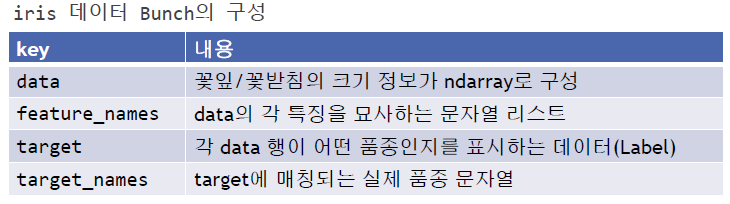

In [5]:
# target의 확인
print("Target:", iris_dataset['target'])

Target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# 학습 데이터를 DataFrame으로 확인
import pandas as pd

iris_df = pd.DataFrame(iris_dataset['data'], # 데이터
                       columns=iris_dataset['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
tnames = [iris_dataset['target_names'][i] for i in iris_dataset['target']]
target_df = pd.DataFrame(zip(iris_dataset['target'], tnames), 
                         columns=['target', 'target_names'])
target_df

,target,target_names
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
...,...,...
145,2,virginica
146,2,virginica
147,2,virginica
148,2,virginica


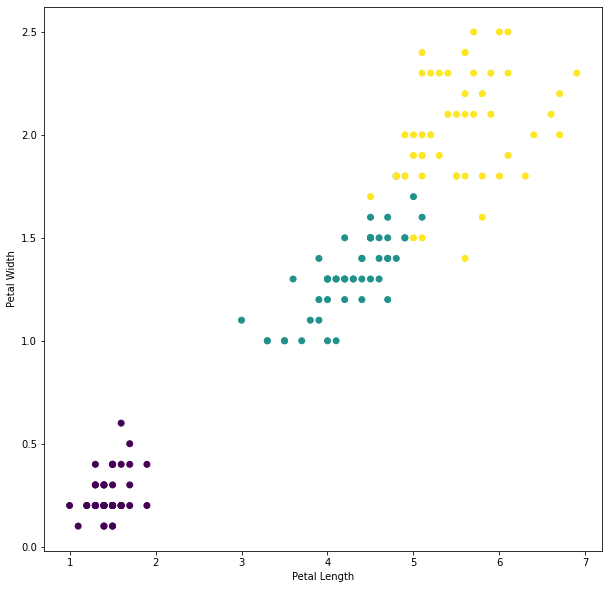

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(iris_df['petal length (cm)'], # x축
            iris_df['petal width (cm)'], # y축
            c= target_df['target'] # 색상
           )
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

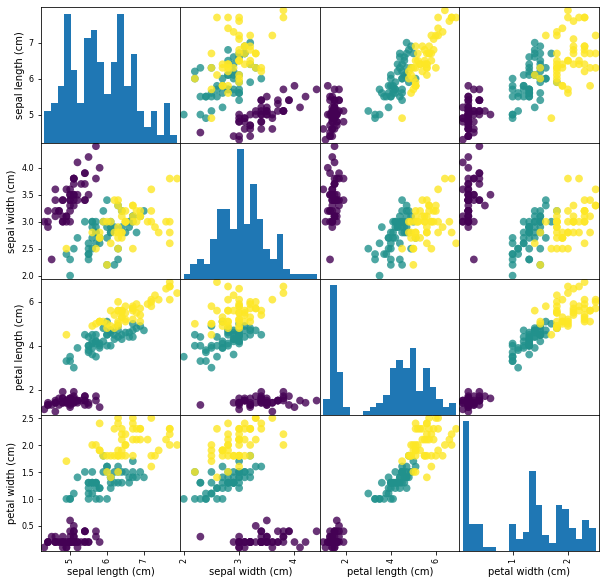

In [10]:
# 산점도 매트릭스
pd.plotting.scatter_matrix(iris_df, # 데이터 셋
                           c=iris_dataset['target'], # 각 데이터의 target으로 색상 구분
                           figsize=(10, 10),
                           marker='o',
                           hist_kwds={"bins": 20},
                           s=60, alpha=.8
                          )
plt.show()

## 학습준비

In [12]:
# 학습 데이터와 테스트 데이터 분할
from sklearn.model_selection import train_test_split
# 분할
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], # 데이터
    iris_dataset['target'], # 라벨
    random_state=0
)

In [13]:
print("X_train size:", X_train.shape)
print("X_test size:", X_test.shape)
print("y_train size:", y_train.shape)
print("y_test size:", y_test.shape)

X_train size: (112, 4)
X_test size: (38, 4)
y_train size: (112,)
y_test size: (38,)


## 학습 준비

### k 최근접 이웃 분류

새로운 데이터 포인트에 대해 예측할 때 , 훈련 데이터셋에서 가장 가까운 데이터 포인트 즉 , 최근접 이웃 을 찾아서 분류하는 알고리즘
가장 중요한 매개변수는 이웃의 개수 (k)


## 학습

In [17]:
# 학습 진행
# kNN 알고리즘 사용
from sklearn.neighbors import KNeighborsClassifier
# 모델
knn = KNeighborsClassifier(n_neighbors=3) # 이웃 3개를 기준으로 분류

In [18]:
knn.fit(X_train, y_train) # 지도학습이니까 학습 데이터화 정답(라벨)

KNeighborsClassifier(n_neighbors=3)

#### 예측하기

- 훈련에 사용되지 않은 새 데이터에 대해 예측을 진행해 봅니다
- Estimator 의 predict 메서드를 이용 , 예측을 진행합니다

In [20]:
# 새로운 데이터를 이용한 품종의 예측
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])

prediction = knn.predict(X_new)
print("예측값:", prediction)
print("예측한 품종:", iris_dataset['target_names'][prediction])

예측값: [0]
예측한 품종: ['setosa']


## 평가

모델 평가를 위해 테스트 세트를 이용하여 Target 을 예측

- 테스트 Target ( y_test) 에 정확한 품종 분류 데이터가 있으므로 예측값과 비교하여 정확도 (Accuracy) 를 측정할 수 있음


In [22]:
# 평가(Evaluate)
# X_test(테스트 데이터 셋)으로 예측
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:", y_pred)
print("테스트 세트 라벨(정답):", y_test)

테스트 세트에 대한 예측값: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
테스트 세트 라벨(정답): [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [23]:
# 정확도 판단
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.97


In [24]:
# 정확도 판단(score)
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97
